In [101]:
### Unsupervised Machine Learning

# Clustering is unsupervised, meaning it doesn't require labeled data or pre-defined target outputs.

# Common Clustering Algorithms:
# K-Means Clustering

In [102]:
# Import required libraries
# Data Analysis libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [103]:
# Load the dataset

data = pd.read_csv(r"C:\Users\ubahl\OneDrive\Desktop\WK 14\Customers.csv")

In [104]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [105]:
data.tail()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [106]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [107]:
data.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [109]:
data.shape

(200, 5)

In [110]:
data.isnull()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [111]:
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

<Axes: >

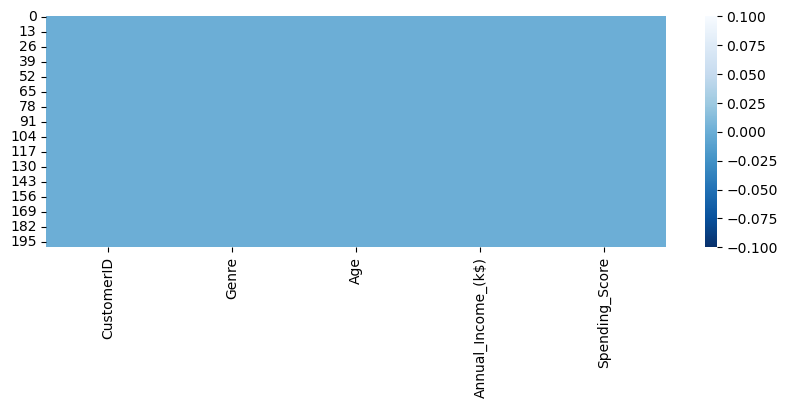

In [112]:
# To visualize the missing data

plt.figure (figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

### Data Cleaning and Pre-processing

In [113]:
# cheack for duplicate

print(data.duplicated().sum())

0


## Exploratory Data Analysis

In [114]:
# we have Univariate
# Bivariate
# Multivariate

# Here we are starting with univariate analysis

### Univariate Analysis

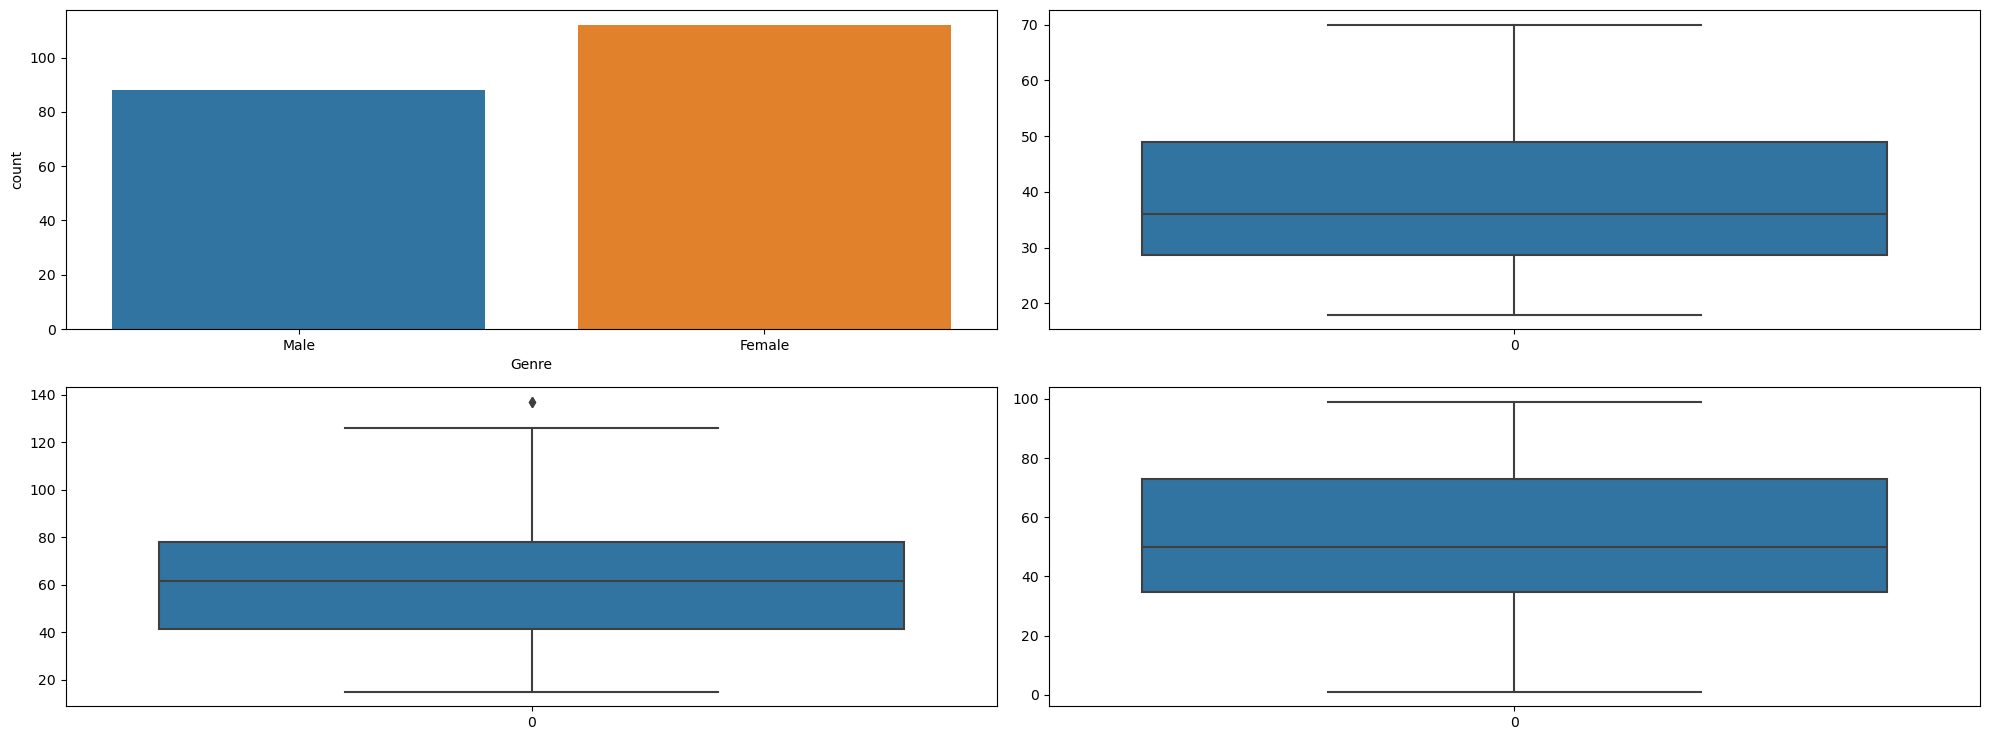

In [115]:
fig, axs = plt.subplots(2,2,figsize = (20,7.5))
plt1 = sns.countplot(x=data["Genre"], ax = axs[0,0])
plt2 = sns.boxplot(data["Age"], ax = axs[0,1])
plt3 = sns.boxplot(data["Annual_Income_(k$)"], ax = axs[1,0])
plt4 = sns.boxplot(data["Spending_Score"], ax = axs[1,1])

plt.tight_layout()

In [116]:
# Narration: from the above layout, we have more female customers than male
# there is one outlier in the annual income column
# we have more customers above the age of 35
# we also have more customers with spnding score of above 40

### Machine Learning model training

In [117]:
## convert categorical columns to nuerical data
# Label encoder helps to transform categorical data to numerical

from sklearn.preprocessing import LabelEncoder
# Label Encoding
encoder = LabelEncoder() # method initialization
# Looping for columns except survived
for c in data.columns[1:]:
    if(data[c].dtype=="object"):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]

In [118]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [119]:
# Remove unwanted columns
# here remove customerID <=====> Remove any colum that is unique identifier like phone number, 

data.drop("CustomerID", axis=1, inplace=True)

In [120]:
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Elbow Method is a technique used to determine the optimal number of clusters in a dataset 
# for algorithms like K-Means clustering. It helps identify the ideal number of clusters by balancing between 
# underfitting (too few clusters) and overfitting (too many clusters).

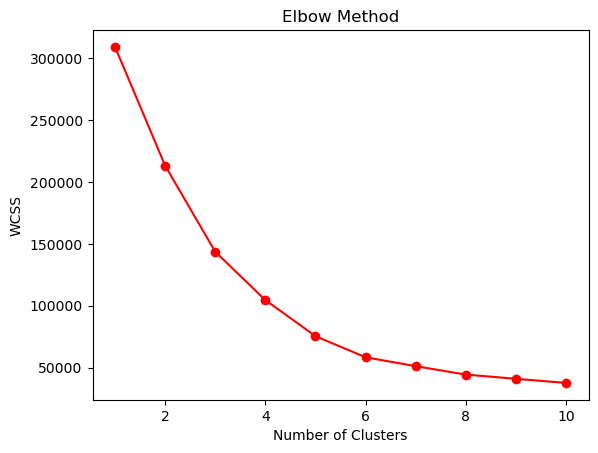

In [125]:
# Determine the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    Kmeans.fit(data)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11), wcss, color="red", marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.show()

# the plot above shows that the optimal number of clusters is 5, as the wcss starts to decrease at a slower rate beyound that point.

In [126]:
# fit k-means clustering model

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(data)
# Add cluster labels to data
data["Cluster"] = kmeans.labels_

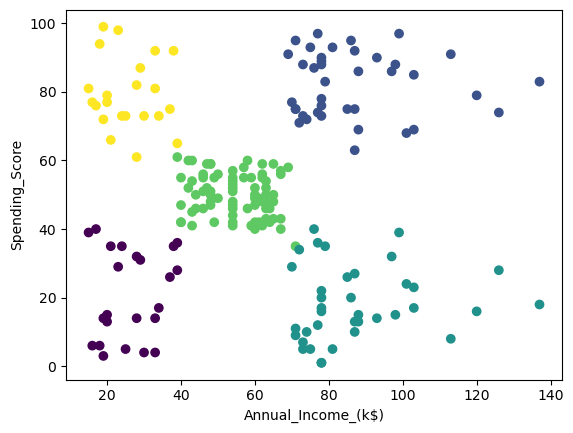

NameError: name 'kmean' is not defined

In [127]:
# visualize cluster result
plt.scatter(data["Annual_Income_(k$)"], data["Spending_Score"], c = data["Cluster"], label = "Centroids")
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")

plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score 
silhouette_score(data, kmean.labels_)

In [128]:
# In conclusion, we derived an insight from the data that shows we have different types of customers
# 1. Low income earners that has low spending score 
# 2. low income earners that has high spending score
# 3. average income earners with average spending score
# 4. High income earners with low spending score
# lastly high income earners with very high spending score.